In [ ]:
# Importar librerías
import pandas as pd #Se usa para trabajar con datos en estructura de dataframe(tablas)
import matplotlib.pyplot as plt # Se usa para crear gráficos
import numpy as np  #Se usa para los cálculos numéricos

#Utilizo el ejercicio de BMI para crear un nuevo dataset (con BMI me refiero a un ejercicio anterior donde también creabamos las columnas del
# dataframe y siguiendo ese ejemplo creo las listas que vemos abajo "value_X_list y value_Y_list")

# Crear un dataset
# Crear las listas de valores
value_X_list = [1, 2, 2, 3, 4, 4, 5, 6]
value_Y_list = [2, 3, 4, 4, 4, 6, 5, 7]

# Crear un diccionario (Con esto definimos los nombres de cada columna)
data_dict = {
    "X": value_X_list,
    "Y": value_Y_list
}

# Crear un dataframe a partir del diccionario (crea la tabla con los nombres definidos arriba y los valores de las listas)
df = pd.DataFrame(data_dict)

#con df mostramos la tabla en la pantalla
df


,X,Y
0,1,2
1,2,3
2,2,4
3,3,4
4,4,4
5,4,6
6,5,5
7,6,7


In [ ]:
# aqui con df agregamos una nueva columna llamada XY que tendra los valores de X
# por (*) Y (multiplicación)
df['XY'] = df['X']*df['Y']
df

,X,Y,XY
0,1,2,2
1,2,3,6
2,2,4,8
3,3,4,12
4,4,4,16
5,4,6,24
6,5,5,25
7,6,7,42


In [ ]:
#Lo mismo que en la linea anterior pero elevamos al cuadrado X
df['X²'] = df['X'] ** 2
df

,X,Y,XY,X²
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36


In [ ]:
# Asegurarse de que el índice 'Total' no esté presente antes de agregarlo
# Como el dataframe tiene un índice esto interfiere en el cálculo, lo que hago aqui es ignorar el indice
# para seguir con el cálculo en la linea 8

if 'Total' in df.index:
    df = df[df.index != 'Total']

# Calcular la suma de cada columna numérica
sum_row = df[['X', 'Y', 'XY', 'X²']].sum(numeric_only=True)

# Agregar la fila de sumas al final del DataFrame
df.loc['Total'] = sum_row

# Mostrar el DataFrame con la fila de sumas
df

,X,Y,XY,X²
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36
Total,27,35,135,111


In [ ]:
# Asegurarse de que no haya una fila con el índice 'Total'
if 'Total' in df.index:
    df = df[df.index != 'Total']

#Arriba podemos ver en la última fila los totales de cada columna
#Aqui lo que hago es agregar esos valores a una variable para usarla en formulas más adelante
#Sum_X SumY etc solo son los totales calculados arriba

# Calcular sumas necesarias
sum_X = df['X'].sum()
sum_Y = df['Y'].sum()
sum_XY = df['XY'].sum()
sum_X_squared = df['X²'].sum()
n = len(df)

#Con print veo que todo esté OK
print(sum_X, sum_Y, sum_XY, sum_X_squared, n)

27 35 135 111 8


In [ ]:
# Calcular la pendiente (m)
#Usando las variables definidas arriba es decir los totales, seguimos las formulas del video
#Primero calculamos la pendiente "m"
m = (n * sum_XY - sum_X * sum_Y) / (n * sum_X_squared - sum_X ** 2)
print(m)

0.8490566037735849


In [ ]:
# Calcular el intercepto (b)
b = (sum_Y - m * sum_X) / n
print(b)

1.5094339622641506


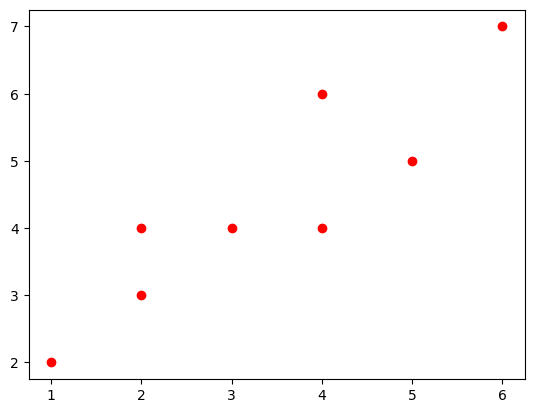

In [ ]:
# Graficar los puntos de datos
# Usando scatter graficamos primero los puntos
plt.scatter(df['X'], df['Y'], color='red', label='Datos')

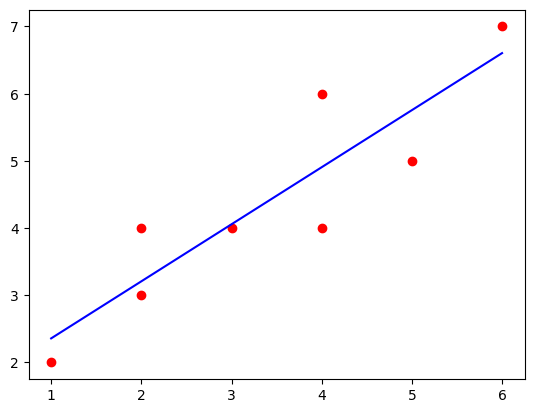

In [ ]:
# Graficar la línea de regresión
x_values = np.linspace(df['X'].min(), df['X'].max(), 100)  # Valores de X para la línea de regresión
y_values = m * x_values + b  # Ecuación de la línea de regresión

plt.plot(x_values, y_values, color='blue', label='Línea de regresión')

#agrego la dispersión para que queden juntos los dos gráficos
# Graficar los puntos de datos
plt.scatter(df['X'], df['Y'], color='red', label='Datos')

In [ ]:
df


,X,Y,XY,X²,Y_pred,Residuo,Residuo²
0,1,2,2,1,2.358491,-0.358491,0.128515
1,2,3,6,4,3.207547,-0.207547,0.043076
2,2,4,8,4,3.207547,0.792453,0.627981
3,3,4,12,9,4.056604,-0.056604,0.003204
4,4,4,16,16,4.905660,-0.905660,0.820221
5,4,6,24,16,4.905660,1.094340,1.197579
6,5,5,25,25,5.754717,-0.754717,0.569598
7,6,7,42,36,6.603774,0.396226,0.156995


In [ ]:
# Calcular los valores predichos usando .loc para evitar el SettingWithCopyWarning un error que consulté en la clase
# que ocurre porque python hace el cálculo para cada celda pero en realidad queremos hacerlo de una vez para
# toda la columna ".loc" evita esa advertencia

df.loc[:, 'Y_pred'] = m * df['X'] + b

# Calcular los residuos y el cuadrado de los residuos
df.loc[:, 'Residuo'] = df['Y'] - df['Y_pred']
df.loc[:, 'Residuo²'] = df['Residuo'] ** 2


# Calcular la suma de los residuos cuadrados
SR_residual = df['Residuo²'].sum()

# Imprimir el resultado
print(f"Suma de los Residuos Cuadrados (SR residual) = {SR_residual}")
df

Suma de los Residuos Cuadrados (SR residual) = 3.5471698113207544


,X,Y,XY,X²,Y_pred,Residuo,Residuo²
0,1,2,2,1,2.358491,-0.358491,0.128515
1,2,3,6,4,3.207547,-0.207547,0.043076
2,2,4,8,4,3.207547,0.792453,0.627981
3,3,4,12,9,4.056604,-0.056604,0.003204
4,4,4,16,16,4.905660,-0.905660,0.820221
5,4,6,24,16,4.905660,1.094340,1.197579
6,5,5,25,25,5.754717,-0.754717,0.569598
7,6,7,42,36,6.603774,0.396226,0.156995


In [ ]:
raiz_cuadrada = SR_residual ** 0.5
Error_Lineal_Promedio = raiz_cuadrada/n
Error_Lineal_Promedio

0.23542414553712793

In [ ]:
from math import sqrt
raiz_cuadrada = sqrt(SR_residual)
Error_Lineal_Promedio = raiz_cuadrada/n
Error_Lineal_Promedio

0.23542414553712793